## The Hitchhiker's Guide to the All-Interval 12-Tone Rows

### *Everything You  Always Wanted to Know about All-Interval Rows but were Afraid to ask Robert Morris*


All-interval 12-tones row generators (AIG) cathalogue beyond Robert Morris and Daniel Starr

See also:

Bauer-Mendelberg, Stefan, and Melvin Ferentz (1965). "On Eleven-Interval Twelve-Tone Rows", Perspectives of New Music 3/2: 93–103.

Cohen, David (1972–73). "A Re-examination of All-Interval Rows", Proceedings of the American Society of University Composers 7/8: 73–74.

Robert Morris and Daniel Starr, The Structure of All-Interval Series, Journal of Music Theory, Vol. 18, No. 2 (Autumn, 1974), pp. 364-389.

Elliott Carter, Harmony Book, Nicholas Hopkins, John F. Link, eds. Carl Fischer Music Publisher (July 1, 2002)

#### Marco Buongiorno Nardelli, May 2020

In [3]:
import itertools, math
import pickle
import numpy as np
import pandas as pd
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [6]:
class AIrow:
#     Helper class for 12-tone rows operations (T,I,R,M,Q)
    def __init__(self,pcs,TET=12):
        self.pcs = np.array(pcs)%TET
        self.TET = TET
    def normalOrder(self):
        self.pcs -= self.pcs[0]
        return(AIrow(self.pcs%12))
    def intervals(self):
        return((np.roll(self.pcs,-1)-self.pcs)%self.TET)
    def T(self,t=0):
        return(AIrow((self.pcs+t)%self.TET,TET=self.TET))
    def I(self,pivot=0):
        return(AIrow((pivot-self.pcs)%self.TET,TET=self.TET))
    def R(self):
        return(AIrow(self.pcs[::-1]).T(6))
    def Q(self):
        lisv = AIrow(self.pcs).intervals()
        lisvQ = np.roll(lisv,np.where(lisv==6)[0][1]-np.where(lisv==6)[0][0])
        Qrow = [0]
        for n in lisvQ:
            Qrow.append((Qrow[-1]+n)%self.TET)
        Qrow.pop()
        return(AIrow(Qrow))
    def M(self):
        return(AIrow((self.pcs*5)%self.TET//1,TET=self.TET))
    def constellation(self):
#         Following Morris and Starr
        reference = []
        entry = ['P',str(self.pcs),str(self.I().pcs),str(self.M().I().pcs),str(self.M().pcs)]
        reference.append(entry)
        entry = ['R',str(self.R().pcs),str(self.I().R().pcs),str(self.M().I().R().pcs),str(self.M().R().pcs)]
        reference.append(entry)
        entry = ['QR',str(self.R().Q().pcs),str(self.I().R().Q().pcs),str(self.M().I().R().Q().pcs),
                 str(self.M().R().Q().pcs)]
        reference.append(entry)
        entry = ['Q',str(self.Q().pcs),str(self.I().Q().pcs),str(self.M().I().Q().pcs),str(self.M().Q().pcs)]
        reference.append(entry)
        star = pd.DataFrame(reference,columns=['','P','I','IM','M'])
        return(star)
    def star(self):
#         star of the row in prime form
        reference = []
        entry = ['P',(self.pcs)]
        reference.append(entry)
        entry = ['I',(self.I().pcs)]
        reference.append(entry)
        entry = ['R',(self.R().pcs)]
        reference.append(entry)
        entry = ['Q',(self.Q().pcs)]
        reference.append(entry)
        entry = ['M',(self.M().pcs)]
        reference.append(entry)
        star = pd.DataFrame(reference,columns=['Op','Row'])
        return(star)

In [7]:
def Remove(duplicate): 
    # function to remove duplicates from list
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 

In [3]:
def parsimonious_distance(a,b):
    diff = np.abs(a-b)
    diff = np.where(diff > 6, np.abs(diff-12), diff)
    diff = np.sum(diff**2)
    return(np.sqrt(diff))

We use the concept of Linear Interval Sequence Vector - sequence of intervals in an ordered pcs
also known as step-interval vector (see Cohn, Neo-Riemannian Operations, 
Parsimonious Trichords, and Their "Tonnetz" Representations,
Journal of Music Theory, Vol. 41, No. 1 (Spring, 1997), pp. 1-66) and originally introduced by Morris as the cyclic interval succession vector of stride 1 (see Morris, Composition with pitch-classes: a theory of compositional design, Yale University Press, New Haven (1987)).

as an example, this is the row from Alban Berg's *Lyric Suite*

In [4]:
lisv = AIrow([5,4,0,9,7,2,8,1,3,6,10,11]).intervals()

if the LISV is known, then the pc row can be easily reconstructed (in **normal form**)

In [5]:
row = [5]
for n in lisv:
    row.append((row[-1]+n)%12)
row.pop()
print(row)

[5, 4, 0, 9, 7, 2, 8, 1, 3, 6, 10, 11]


## Combinatorial calculation of the tone rows generators

To produce the "prime form" generators of all the existing 12-tone rows, we construct all the possible permutations of the LISV vector that contains all the intervals and then reconstruct the rows starting with pc 0.

Note that since the computation of the LISV exploits the cyclic property of the row we need to duplicate at least one interval at the end. From computational experiments it turns out that each unique 12-tone row must have a tritone between the last pc and the first when orderd in this manner ("prime form").

As it will be clearer in the following, we will eliminate from the catalogue, all rows that are equivalent by inversion, retrograde, multiplication and cyclic permutation - thus the term "prime form".

Once all the permutations have been computed (11! = 39,916,800) we must eliminate all the rows that have duplicate pitches. This operation reduces the number of unique rows to 3,856 transpositionally and invertionally equivalent AIS.

In [8]:
perm = itertools.permutations([1,2,3,4,5,6,7,8,9,10,11])
last = 6
all_rows = []
for n in list(perm):
    ll = list(n)
    ll.append(last)
    row = [0]
    for j in ll:
        row.append((row[-1]+j)%12)
    row.pop()
    rown = Remove(row)
    if len(rown) == 12:
        all_rows.append(row)

In [ ]:
f = open('all-interval-rows.txt','w')
for n in all_rows:
    f.write(str(n)+'\n')
f.close()

In [ ]:
f = open('all-interval.rows','wb')
pickle.dump(all_rows,f)
f.close()

In [ ]:
f = open('all-interval.rows','rb')
all_rows = pickle.load(f)
f.close()

In [11]:
all_rows[:10]

[[0, 1, 3, 7, 2, 5, 11, 10, 8, 4, 9, 6],
 [0, 1, 3, 7, 2, 10, 8, 11, 5, 4, 9, 6],
 [0, 1, 3, 7, 2, 11, 4, 10, 9, 5, 8, 6],
 [0, 1, 3, 7, 2, 11, 10, 4, 9, 5, 8, 6],
 [0, 1, 3, 7, 4, 11, 9, 8, 2, 5, 10, 6],
 [0, 1, 3, 7, 4, 2, 9, 8, 11, 5, 10, 6],
 [0, 1, 3, 7, 5, 8, 4, 10, 9, 2, 11, 6],
 [0, 1, 3, 7, 5, 2, 9, 8, 11, 4, 10, 6],
 [0, 1, 3, 7, 5, 2, 10, 4, 9, 8, 11, 6],
 [0, 1, 3, 8, 11, 5, 9, 4, 2, 10, 7, 6]]

Define the AIrow class

### reduction of rows to prime form  - eliminate rows that are equivalent for any of the primary transformations: I,R,Q, and M

In [10]:
prime_form_rows = all_rows[:1928].copy()
# this above takes care of the equivalence by I
index = []
for i in range(1928):
    for j in range(i+1,1928):
        if str(AIrow(all_rows[i]).R().pcs) == str(AIrow(all_rows[j]).pcs):
            index.append(j)
        if str(AIrow(all_rows[i]).Q().pcs) == str(AIrow(all_rows[j]).pcs):
            index.append(j)
        if str(AIrow(all_rows[i]).M().pcs) == str(AIrow(all_rows[j]).pcs):
            index.append(j)

In [12]:
idx = Remove(index)

In [13]:
for i in range(len(idx)):
    prime_form_rows.pop(np.sort(idx)[::-1][i])

In [14]:
print('there are ',len(prime_form_rows),' prime form rows (generators)')
prime_form_rows[:10]

there are  918  prime form rows (generators)


[[0, 1, 3, 7, 2, 5, 11, 10, 8, 4, 9, 6],
 [0, 1, 3, 7, 2, 10, 8, 11, 5, 4, 9, 6],
 [0, 1, 3, 7, 2, 11, 4, 10, 9, 5, 8, 6],
 [0, 1, 3, 7, 2, 11, 10, 4, 9, 5, 8, 6],
 [0, 1, 3, 7, 4, 11, 9, 8, 2, 5, 10, 6],
 [0, 1, 3, 7, 4, 2, 9, 8, 11, 5, 10, 6],
 [0, 1, 3, 7, 5, 8, 4, 10, 9, 2, 11, 6],
 [0, 1, 3, 7, 5, 2, 9, 8, 11, 4, 10, 6],
 [0, 1, 3, 7, 5, 2, 10, 4, 9, 8, 11, 6],
 [0, 1, 3, 8, 11, 5, 9, 4, 2, 10, 7, 6]]

In [ ]:
f = open('prime-form.rows','wb')
pickle.dump(prime_form_rows,f)
f.close()

In [ ]:
f = open('prime-form.rows','rb')
prime_form_rows = pickle.load(f)
f.close()

There are 57 rows that are non-retrogradable - these are the ones that Elliott Carter in his "Harmony Book" calls **symmetrical inverted**, in which inversionally related intervals are distributed in opposing directions around a tritone

In [15]:
non_retro_rows = []
for i,n in enumerate(prime_form_rows):
    if str(AIrow(n).R().pcs) == str(AIrow(n).pcs):
        non_retro_rows.append(n)

In [16]:
print('there are ',len(non_retro_rows),' non-retrogradable (symmetrical inverted) prime form rows (generators)')
non_retro_rows[:10]

there are  57  non-retrogradable (symmetrical inverted) prime form rows (generators)


[[0, 1, 3, 10, 2, 5, 11, 8, 4, 9, 7, 6],
 [0, 1, 3, 10, 2, 11, 5, 8, 4, 9, 7, 6],
 [0, 1, 4, 8, 3, 5, 11, 9, 2, 10, 7, 6],
 [0, 1, 4, 2, 9, 5, 11, 3, 8, 10, 7, 6],
 [0, 1, 5, 8, 10, 3, 9, 4, 2, 11, 7, 6],
 [0, 1, 5, 2, 4, 9, 3, 10, 8, 11, 7, 6],
 [0, 1, 9, 4, 2, 5, 11, 8, 10, 3, 7, 6],
 [0, 1, 9, 4, 2, 11, 5, 8, 10, 3, 7, 6],
 [0, 1, 10, 2, 9, 11, 5, 3, 8, 4, 7, 6],
 [0, 1, 10, 8, 3, 11, 5, 9, 2, 4, 7, 6]]

while there are no rows that are "unitary" - invariant by inversion

In [17]:
for n in all_rows:
    if str(AIrow(n).I().pcs) == str(AIrow(n).pcs):
        print(n)

We can also look for the other class of Carter's all-interval rows, **parallel inverted**, in which inversionally related intenvals hold parallel positions in each part of the chord, again around a central tritone - there are 37 prime form rows that are parallel inverted)

In [19]:
parinv = []
for n in prime_form_rows:
    tmp = AIrow(n).intervals()
    condition = (tmp + np.roll(tmp,6)) == 12
    if condition.all():
        parinv.append(n)

In [20]:
print('there are ',len(parinv),' parallel inverted prime form rows (generators)')
parinv[:10]

there are  34  parallel inverted prime form rows (generators)


[[0, 1, 3, 7, 2, 5, 11, 10, 8, 4, 9, 6],
 [0, 1, 4, 2, 10, 3, 9, 8, 5, 7, 11, 6],
 [0, 1, 5, 7, 10, 3, 9, 8, 4, 2, 11, 6],
 [0, 1, 5, 7, 4, 9, 3, 2, 10, 8, 11, 6],
 [0, 1, 8, 10, 2, 11, 5, 4, 9, 7, 3, 6],
 [0, 1, 8, 4, 2, 5, 11, 10, 3, 7, 9, 6],
 [0, 1, 9, 7, 2, 11, 5, 4, 8, 10, 3, 6],
 [0, 1, 10, 2, 9, 11, 5, 4, 7, 3, 8, 6],
 [0, 1, 10, 5, 7, 3, 9, 8, 11, 4, 2, 6],
 [0, 1, 10, 8, 3, 11, 5, 4, 7, 9, 2, 6]]

#### Hexachordal combinatoriality

In [ ]:
# only hexachordal combinatoriality found is for A = TnI(B) or A= TnR(B)
# that is equivalent to symmetrical inverted or parallel inverted
hexacomb = [] 
hexaI = []
hexaR = []
for n in prime_form_rows:
    a = np.array(n)[:6]
    b = np.array(n)[6:]
    for i in range(12):
        if str(AIrow(a).pcs) == str(AIrow(b).I().T(i).pcs):
            hexacomb.append(['I',n,i])
            hexaI.append(n)
        if str(AIrow(a).pcs) == str(AIrow(b).R().T(i).pcs):
            hexacomb.append(['R',n,i])
            hexaR.append(n)
        if str(AIrow(a).pcs) == str(AIrow(a).I().M().T(i).pcs):
            hexacomb.append(['XX',n,i])

**Link's** chords

In [21]:
links = []
linkch = []
for a in prime_form_rows:
    lperm = itertools.permutations([0,1,2,4,7,8])
    for p in list(lperm):
        for i in range(12):
            l0 = AIrow(list(p)).T(i).pcs.tolist()
            try:
                ind = [x for x in range(len(a)) if a[x:x+len(l0)] == l0][0]
                links.append([a,list(p),i,ind])
                linkch.append(a)
            except:
                pass
print('there are',len(links),'Link'+"'s",'all-interval rows')
if len(links) > 0:
    for i in range(10):
        print(links[i])

there are 121 Link's all-interval rows
[[0, 1, 3, 8, 2, 5, 9, 7, 4, 11, 10, 6], [0, 2, 7, 1, 4, 8], 1, 1]
[[0, 1, 4, 8, 7, 2, 10, 3, 5, 11, 9, 6], [0, 1, 4, 8, 7, 2], 0, 0]
[[0, 1, 4, 8, 7, 2, 11, 9, 3, 5, 10, 6], [0, 1, 4, 8, 7, 2], 0, 0]
[[0, 1, 4, 8, 7, 2, 11, 9, 3, 5, 10, 6], [1, 0, 7, 4, 2, 8], 7, 3]
[[0, 1, 4, 10, 5, 3, 11, 8, 7, 9, 2, 6], [8, 4, 1, 0, 2, 7], 7, 5]
[[0, 1, 4, 11, 10, 7, 3, 5, 9, 2, 8, 6], [1, 8, 7, 4, 0, 2], 3, 2]
[[0, 1, 5, 7, 4, 10, 3, 11, 2, 9, 8, 6], [2, 4, 1, 7, 0, 8], 3, 2]
[[0, 1, 5, 10, 4, 7, 3, 2, 9, 11, 8, 6], [0, 8, 7, 2, 4, 1], 7, 5]
[[0, 1, 5, 10, 4, 2, 9, 11, 8, 7, 3, 6], [7, 2, 4, 1, 0, 8], 7, 5]
[[0, 1, 5, 10, 4, 2, 11, 7, 9, 8, 3, 6], [7, 4, 0, 2, 1, 8], 7, 5]


In [ ]:
f = open('link-chords.rows','wb')
pickle.dump(linkch,f)
f.close()

## Forte-like classification and dictionary of all-interval rows in prime form

In [24]:
reference = []
for i,n in enumerate(prime_form_rows):
    name = '12'+'-'+str(i)
    if n in non_retro_rows:
        name = name + 'S'
    if n in parinv:
        name = name + 'P'
    if n in linkch:
        name = name + 'L'
    entry = [name,n,AIrow(n).intervals()]
    reference.append(entry)
dictionary = pd.DataFrame(reference,columns=['Label','Row','Intervals'])

In [ ]:
dictionary.to_csv('all-int-dictionary.csv')

## Generate a network representation based on the parsimonious voice-leading distance between the prime form rows

In [25]:
# Create network of 12-tone all-interval rows from the Dictionary

df = np.asarray(dictionary)

# write csv for nodes
dnodes = pd.DataFrame(df[:,0],columns=['Label'])
dnodes.to_csv('nodes.csv',index=False)

In [26]:
# find edges according to a metric
N = df[:,1].shape[0]
dedges = pd.DataFrame(None,columns=['Source','Target','Weight'])
vector_i = np.zeros((N,12),dtype=int)
pair = np.zeros((N,N),dtype=float)
# vector of pcs
for i in range(N):
    vector_i[i] = np.asarray(df[i,1])

In [27]:
vector_i[:10]

array([[ 0,  1,  3,  7,  2,  5, 11, 10,  8,  4,  9,  6],
       [ 0,  1,  3,  7,  2, 10,  8, 11,  5,  4,  9,  6],
       [ 0,  1,  3,  7,  2, 11,  4, 10,  9,  5,  8,  6],
       [ 0,  1,  3,  7,  2, 11, 10,  4,  9,  5,  8,  6],
       [ 0,  1,  3,  7,  4, 11,  9,  8,  2,  5, 10,  6],
       [ 0,  1,  3,  7,  4,  2,  9,  8, 11,  5, 10,  6],
       [ 0,  1,  3,  7,  5,  8,  4, 10,  9,  2, 11,  6],
       [ 0,  1,  3,  7,  5,  2,  9,  8, 11,  4, 10,  6],
       [ 0,  1,  3,  7,  5,  2, 10,  4,  9,  8, 11,  6],
       [ 0,  1,  3,  8, 11,  5,  9,  4,  2, 10,  7,  6]])

In [30]:
# vectors of distances (not parsimonious voice leading)
for i in range(N):
    for j in range(i,N):
        pair[i,j] = sklm.pairwise_distances(vector_i[i].reshape(1,-1),
                                        vector_i[j].reshape(1,-1),
                                        metric='euclidean')[0]

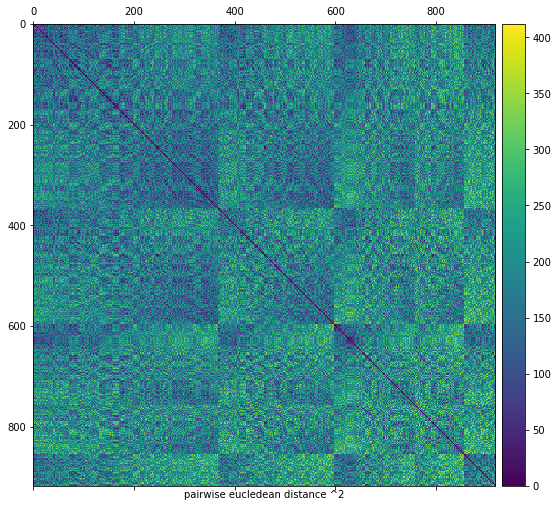

In [33]:
fig = plt.figure(figsize=(30,20))
ax = plt.subplot(236,xlabel='pairwise eucledean distance ^2')
matrix = pair*pair
matrix += matrix.T
im = ax.matshow(matrix)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax)
plt.show()

In [34]:
ix,iy = np.nonzero(pair)
wght = np.asarray(1/pair[ix[:],iy[:]],dtype=str).tolist()
ix = np.asarray(ix,dtype=str).tolist()
iy = np.asarray(iy,dtype=str).tolist()

In [35]:
tmp = []
for i in range(len(ix)):
    if float(wght[i]) > 0.22:
        tmp.append([ix[i],iy[i],wght[i]])

In [37]:
dedges = pd.DataFrame(tmp,columns=['Source','Target','Weight'])

In [ ]:
dedges.to_csv('edges.csv',index=False)

In [38]:
len(dedges)

1002

In [36]:
# vectors of distances (parsimonious voice leading)
parpair = np.zeros((N,N),dtype=float)
for i in range(N):
    for j in range(i,N):
        parpair[i,j] = parsimonious_distance(vector_i[i],vector_i[j])

In [39]:
ix,iy = np.nonzero(parpair)
wght = np.asarray(1/parpair[ix[:],iy[:]],dtype=str).tolist()
ix = np.asarray(ix,dtype=str).tolist()
iy = np.asarray(iy,dtype=str).tolist()

In [40]:
tmp = []
for i in range(len(ix)):
    if float(wght[i]) > 0.22:
        tmp.append([ix[i],iy[i],wght[i]])

In [41]:
dedges_par = pd.DataFrame(tmp,columns=['Source','Target','Weight'])

In [ ]:
dedges_par.to_csv('edges-par.csv',index=False)

In [42]:
len(dedges_par)

1142

### Metric analysis

In [43]:
# Intra-star distances 
N = 184
print(dictionary.loc[N])

star = np.asarray(AIrow(prime_form_rows[N]).star())
print(star)

for i in range(star.shape[0]):
    for j in range(i+1,star.shape[0]):
        print(star[i,0],star[j,0],parsimonious_distance(star[i,1],star[j,1]))

Label                                        12-184
Row          [0, 1, 7, 4, 9, 11, 3, 2, 10, 5, 8, 6]
Intervals    [1, 6, 9, 5, 2, 4, 11, 8, 7, 3, 10, 6]
Name: 184, dtype: object
[['P' array([ 0,  1,  7,  4,  9, 11,  3,  2, 10,  5,  8,  6])]
 ['I' array([ 0, 11,  5,  8,  3,  1,  9, 10,  2,  7,  4,  6])]
 ['R' array([ 0,  2, 11,  4,  8,  9,  5,  3, 10,  1,  7,  6])]
 ['Q' array([ 0,  9,  2,  4,  8,  7,  3, 10,  1, 11,  5,  6])]
 ['M' array([ 0,  5, 11,  8,  9,  7,  3, 10,  2,  1,  4,  6])]]
P I 12.328828005937952
P R 6.6332495807108
P Q 11.313708498984761
P M 11.313708498984761
I R 14.2828568570857
I Q 12.0
I M 14.696938456699069
R Q 9.16515138991168
R M 9.16515138991168
Q M 6.928203230275509


In [44]:
N = 657
print(dictionary.loc[N])
starA = np.asarray(AIrow(prime_form_rows[N]).star())
print(starA)

Label                                        12-657
Row          [0, 3, 4, 11, 5, 2, 10, 8, 7, 9, 1, 6]
Intervals    [3, 1, 7, 6, 9, 8, 10, 11, 2, 4, 5, 6]
Name: 657, dtype: object
[['P' array([ 0,  3,  4, 11,  5,  2, 10,  8,  7,  9,  1,  6])]
 ['I' array([ 0,  9,  8,  1,  7, 10,  2,  4,  5,  3, 11,  6])]
 ['R' array([ 0,  7,  3,  1,  2,  4,  8, 11,  5, 10,  9,  6])]
 ['Q' array([ 0,  9,  5,  3,  2,  4,  8,  1,  7, 10, 11,  6])]
 ['M' array([ 0,  3,  8,  7,  1, 10,  2,  4, 11,  9,  5,  6])]]


In [45]:
M = 184
print(dictionary.loc[M])
starB = np.asarray(AIrow(prime_form_rows[M]).star())
print(starB)

Label                                        12-184
Row          [0, 1, 7, 4, 9, 11, 3, 2, 10, 5, 8, 6]
Intervals    [1, 6, 9, 5, 2, 4, 11, 8, 7, 3, 10, 6]
Name: 184, dtype: object
[['P' array([ 0,  1,  7,  4,  9, 11,  3,  2, 10,  5,  8,  6])]
 ['I' array([ 0, 11,  5,  8,  3,  1,  9, 10,  2,  7,  4,  6])]
 ['R' array([ 0,  2, 11,  4,  8,  9,  5,  3, 10,  1,  7,  6])]
 ['Q' array([ 0,  9,  2,  4,  8,  7,  3, 10,  1, 11,  5,  6])]
 ['M' array([ 0,  5, 11,  8,  9,  7,  3, 10,  2,  1,  4,  6])]]


In [46]:
for i in range(starA.shape[0]):
    print(starA[i,0],starB[i,0],int(parsimonious_distance(starA[i,1],starB[i,1])**2))

P P 174
I I 174
R R 174
Q Q 162
M M 101


The network of *prime forms* is **isomorphic** to the network of the *inverse forms* and the *retrograde forms*